In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
np.random.seed(0)
n = 100
t = np.arange(n)
data = 10 + 0.5*t + np.random.normal(size=n)
data

array([11.76405235, 10.90015721, 11.97873798, 13.7408932 , 13.86755799,
       11.52272212, 13.95008842, 13.34864279, 13.89678115, 14.9105985 ,
       15.14404357, 16.95427351, 16.76103773, 16.62167502, 17.44386323,
       17.83367433, 19.49407907, 18.29484174, 19.3130677 , 18.64590426,
       17.44701018, 21.1536186 , 21.8644362 , 20.75783498, 24.26975462,
       21.04563433, 23.04575852, 23.31281615, 25.53277921, 25.96935877,
       25.15494743, 25.87816252, 25.11221425, 24.51920353, 26.65208785,
       27.65634897, 29.23029068, 29.70237985, 28.61267318, 29.19769725,
       28.95144703, 29.07998206, 29.29372981, 33.4507754 , 31.49034782,
       32.0619257 , 31.74720464, 34.27749036, 32.38610215, 34.28725972,
       34.10453344, 35.8869025 , 35.48919486, 35.31936782, 36.97181777,
       37.92833187, 38.06651722, 38.8024719 , 38.36567791, 39.13725883,
       39.32753955, 40.14044684, 40.18685372, 39.7737174 , 42.17742614,
       42.09821906, 41.36980165, 43.96278226, 43.09270164, 44.55

In [6]:
ts = pd.Series(data)

<Figure size 1200x400 with 0 Axes>

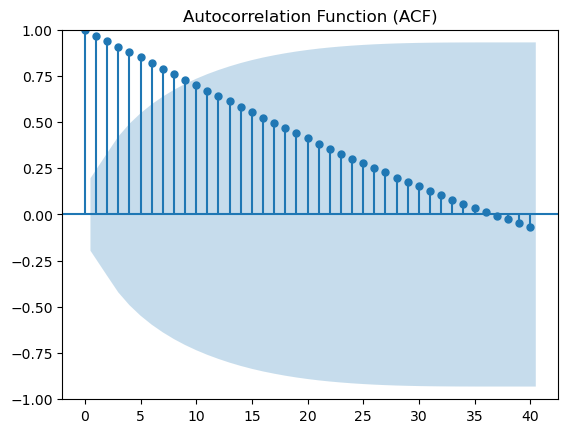

In [7]:
#Plot Auto Correlkation Function
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(ts, lags=40, title='Autocorrelation Function (ACF)')
plt.show()

In [1]:
"""Interpretation
ACF Plot:

1) Observations at lag 1, 2, etc., are significantly correlated with the original series. This means stock prices on consecutive days show a noticeable pattern of relationship.
2) The ACF gradually decreases, suggesting a linear trend in the data.
The ACF measures the correlation between a time series and its lagged values. A decreasing ACF value suggests that the relationship between today's value and its past values is diminishing as the lag increases and vice versa."""


#Auto Regressive Models
from statsmodels.tsa.ar_model import AutoReg

#pip install pandas numpy matplotlib statsmodels yfinance

#Step 1: Import Libraries
# For statistical analysis
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [16]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\23MDT0047\AppData\Local\Temp\ipykernel_10448\28584298.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
[*********************100%%**********************]  1 of 1 completed


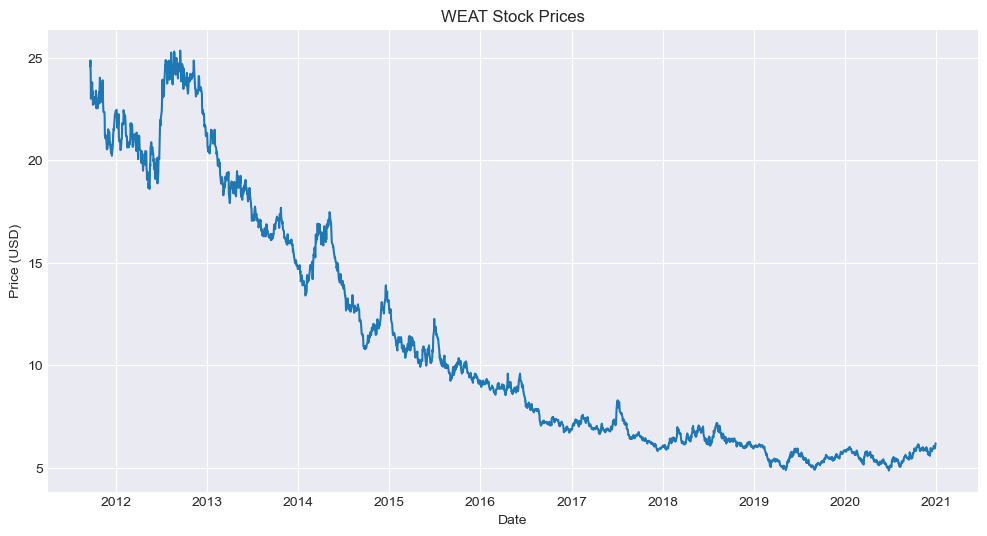

In [2]:
# Import matplotlib and set the style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)

#Step 2: Load Historical Stock Price Data
# Define the ticker symbol
ticker_symbol = "WEAT"

# Download historical data
data = yf.download(ticker_symbol, start="2011-01-01", end="2021-01-01")

# Select the 'Close' prices
prices = data['Close']

# Drop the missing values
data = data.dropna()

# Rolling Window
rolling_window = int(len(data)*0.70)

# Plot the stock prices
plt.figure(figsize=(12, 6))
plt.plot(prices)
plt.title(f"{ticker_symbol} Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()



In [4]:
#Step 3: Train the AR model using ARIMA
from statsmodels.tsa.arima.model import ARIMA
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima.model.ARMA', FutureWarning)

# Train autoregressive model of order 1
model_fit = ARIMA(data['Adj Close'][:rolling_window], order = (1, 0, 0)).fit()
round(model_fit.params,2)
# Function to predict the price of 1 day
def predict_price_AR(train_data):
    # Define model
    model = ARIMA(train_data, order=(1, 0, 0))

    # Fit the model
    model_fit = model.fit()

    # Make forecast
    forecast_results = model_fit.forecast()

    return forecast_results

# Predict the price using predict_price_AR function
data['predicted_price'] = data['Adj Close'].rolling(rolling_window).apply(predict_price_AR)

# Shift the predicted price by 1 period
data['predicted_price'] = data['predicted_price'].shift(1)



The Mean Absolute Error is 0.07
The Mean Squared Error is 0.01
The Root Mean Squared Error is 0.08
The Mean Absolute Percentage Error is 1.13


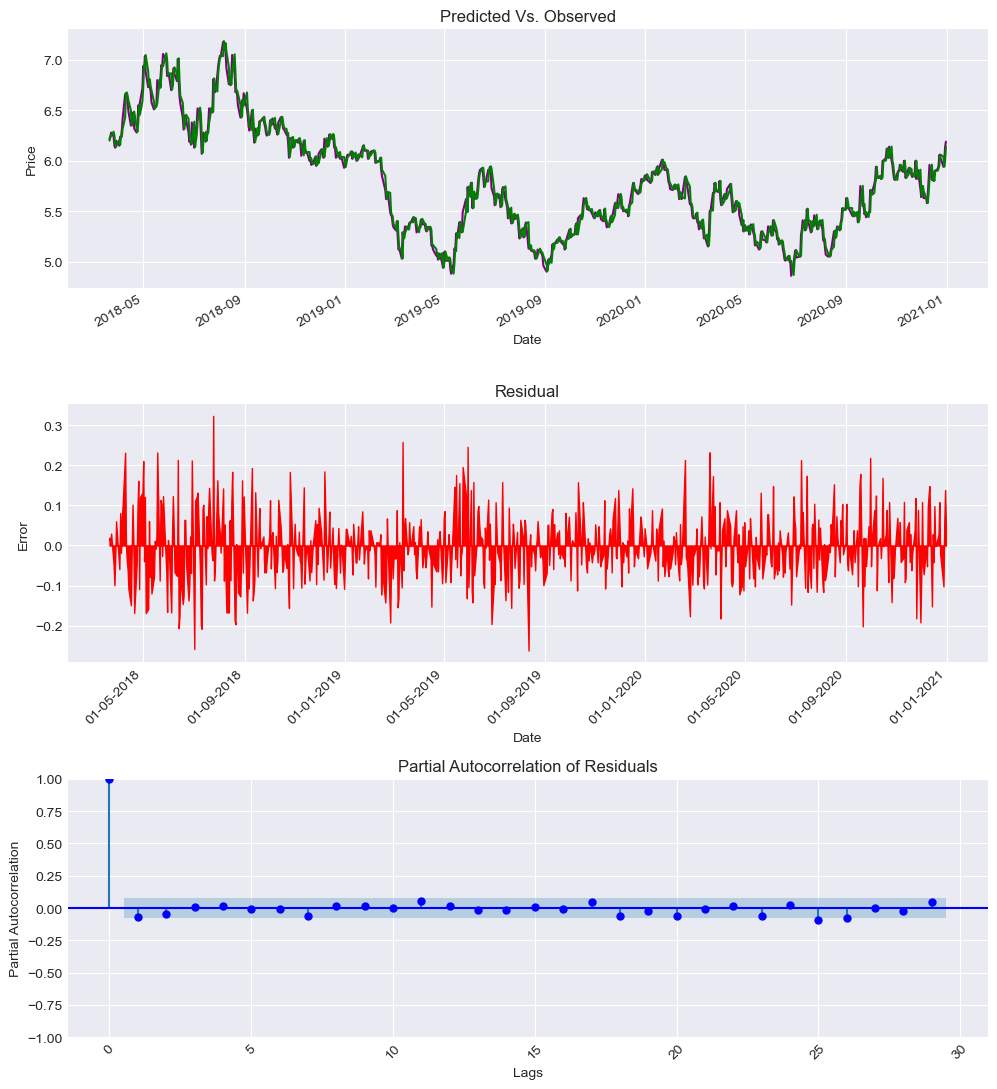

In [5]:
#Step 4: Evaluate model performance
# Import libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def model_performance(observed, predicted):

    
    """This function will print the Mean Absolute Error, Mean Squared Error,
    Root Mean Squared Error and Mean Absolute Percentage Error.
    This function will also display the residual plot and the ACF.
    """

    # Mean Absolute Error
    mae = mean_absolute_error(observed, predicted)
    print('The Mean Absolute Error is %.2f' % mae)

    # Mean Squared Error
    mse = mean_squared_error(observed, predicted)
    print('The Mean Squared Error is %.2f' % mse)

    # Root Mean Squared Error
    rmse = sqrt(mean_squared_error(observed, predicted))
    print('The Root Mean Squared Error is %.2f' % rmse)

    # Mean Absolute Percentage Error
    mape = 100 * ((observed-predicted)/observed).abs().mean()
    print('The Mean Absolute Percentage Error is %.2f' % mape)

    # Residuals
    residuals = observed - predicted
    labels = observed.index
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 11))
    
    # Plot residual
    observed.plot(ax=ax1, color='purple')
    predicted.plot(ax=ax1, color='green')
    ax1.set_ylabel('Price')
    ax1.set_title('Predicted Vs. Observed')
    
    # Plot residual
    ax2.fill_between(residuals.index, residuals.values, color='red')
    ax2.set_ylabel('Error')
    ax2.set_xlabel('Date')
    ax2.set_title('Residual')
    ax2.set_xticklabels(labels, rotation=45, ha='right')
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))
    ax2.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%m-%Y"))
    _=plt.xticks(rotation=45)
    
    # Autocorrelation plot of residuals
    plot_pacf(residuals, ax=ax3, color='blue')
    ax3.set_xlabel('Lags')
    ax3.set_ylabel('Partial Autocorrelation')
    ax3.set_title('Partial Autocorrelation of Residuals')

    plt.tight_layout()
    plt.show()

#Call model performance to evaluate the performance of the model
model_performance(data['Adj Close'].iloc[rolling_window:],
                  data['predicted_price'].iloc[rolling_window:])